<a href="https://colab.research.google.com/github/MarcoMGrc/ACTS_IAYRN_MAMG/blob/main/1950271_pia_iayrn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 3: Entrenamiento de una red neuronal convolucional**
### Marco Antonio Mejia Garcia
###1950271
###008 N4 LMV

LIBRERIAS

In [ ]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import glob
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
!pip install kaggle
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"enriquetrevio","key":"d963768031cf2010518ca31f65cb6f15"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prasunroy/natural-images

Dataset URL: https://www.kaggle.com/datasets/prasunroy/natural-images
License(s): CC-BY-NC-SA-4.0
natural-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path ='/content/natural-images.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [ ]:
# Inicializa las listas para almacenar las imágenes y las etiquetas
imagenes = [] # Changed to list
etiquetas = [] # Changed to list

carpeta_principal = '/content/Dataset/natural_images'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:
    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario
        for x in glob.iglob(f'{subcarpeta}/*.*g'): # search for both .png and .jpg
            # Indented block starts here
            print(x)
            test_image = cv2.imread(x)
            # ... (rest of the code remains the same)

            # Formato de imagen
            img_resized = cv2.resize(test_image, (100,100), )

            # Guardar imagenes y etiquetas
            arreglo_imagen = np.array(img_resized)
            imagenes.append(arreglo_imagen)
            etiquetas.append(z)
    z += 1 # This line should be outside the inner loop # Moved outside the inner loop


Se truncaron las últimas líneas 5000 del resultado de transmisión.
/content/Dataset/natural_images/fruit/fruit_0153.jpg
/content/Dataset/natural_images/fruit/fruit_0912.jpg
/content/Dataset/natural_images/fruit/fruit_0187.jpg
/content/Dataset/natural_images/fruit/fruit_0649.jpg
/content/Dataset/natural_images/fruit/fruit_0056.jpg
/content/Dataset/natural_images/fruit/fruit_0403.jpg
/content/Dataset/natural_images/fruit/fruit_0290.jpg
/content/Dataset/natural_images/fruit/fruit_0002.jpg
/content/Dataset/natural_images/fruit/fruit_0185.jpg
/content/Dataset/natural_images/fruit/fruit_0360.jpg
/content/Dataset/natural_images/fruit/fruit_0952.jpg
/content/Dataset/natural_images/fruit/fruit_0617.jpg
/content/Dataset/natural_images/fruit/fruit_0409.jpg
/content/Dataset/natural_images/fruit/fruit_0874.jpg
/content/Dataset/natural_images/fruit/fruit_0719.jpg
/content/Dataset/natural_images/fruit/fruit_0079.jpg
/content/Dataset/natural_images/fruit/fruit_0701.jpg
/content/Dataset/natural_images/

In [ ]:
etiquetas = np.array(etiquetas)

In [ ]:
imagenes = np.array(imagenes)

In [ ]:
np.shape(imagenes)

(6899, 100, 100, 3)

In [ ]:
len(etiquetas)

6899

In [ ]:
etiquetas[+1]

0

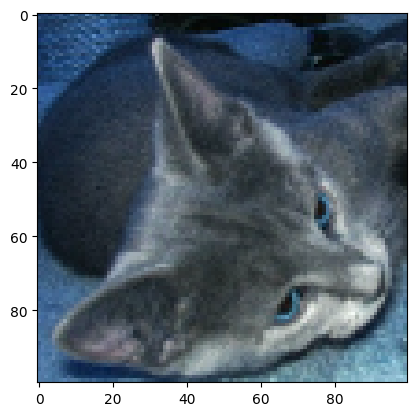

In [ ]:
plt.imshow(imagenes[10])

PREPROCESAMIENTO

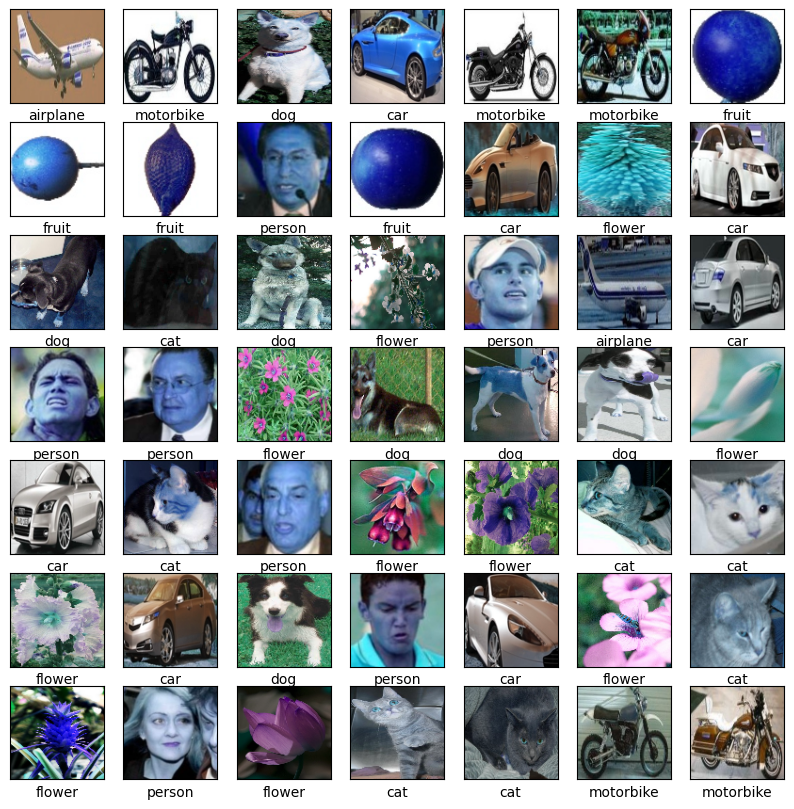

In [ ]:

label_mapping = {
    0: 2,  # airplane
    1: 6,  # car
    2: 5,  # cat
    3: 1,  # dog
    4: 4,  # flower
    5: 3,  # fruit
    6: 7,  # motorbike
    7: 0   # person
    # ... Agrega más mapeos según sea necesario ...
}

# 1. Redefine las etiquetas ANTES de dividir los datos
new_etiquetas = np.vectorize(label_mapping.get)(etiquetas)

# 2. Divide los datos en conjuntos de entrenamiento y prueba
# usando 'new_etiquetas'
images_train, images_test, labels_train, labels_test = train_test_split(
    imagenes, new_etiquetas, test_size=0.2, random_state=42
)


class_names = ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

plt.figure(figsize=(10, 10))

num_images_to_display = min(49, len(images_train))

for i in range(num_images_to_display):
    plt.subplot(7, 7, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i])

    # 3. Maneja etiquetas desconocidas durante la visualización
    label_index = labels_train[i]
    if 0 <= label_index < len(class_names):
        plt.xlabel(class_names[label_index])
    else:
        plt.xlabel(f"Unknown Label ({label_index})")

plt.show()

Estructura y entrenamiento de Red Neuronal Artificial Convolusional (RNAC)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

NameError: name 'models' is not defined

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,806,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,863,760 (7.11 MB)

 Trainable params: 1,863,760 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Entrenamiento de la RNAC
history = model.fit(images_train, labels_train, epochs=15,
                    validation_data=(images_test, labels_test))

Epoch 1/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 108s 625ms/step - accuracy: 0.9929 - loss: 0.0253 - val_accuracy: 0.8065 - val_loss: 1.1487
Epoch 2/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 140s 613ms/step - accuracy: 0.9604 - loss: 0.1523 - val_accuracy: 0.8239 - val_loss: 1.1292
Epoch 3/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 141s 611ms/step - accuracy: 0.9857 - loss: 0.0453 - val_accuracy: 0.8275 - val_loss: 0.9483
Epoch 4/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 141s 605ms/step - accuracy: 0.9935 - loss: 0.0238 - val_accuracy: 0.8036 - val_loss: 1.2232
Epoch 5/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 137s 576ms/step - accuracy: 0.9918 - loss: 0.0290 - val_accuracy: 0.8072 - val_loss: 1.3173
Epoch 6/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 104s 598ms/step - accuracy: 0.9885 - loss: 0.0436 - val_accuracy: 0.8000 - val_loss: 1.3448
Epoch 7/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 137s 573ms/step - accuracy: 0.9881 - loss: 0.0474 - val_accuracy: 0.8341 - val_loss: 1.2090
Epoch 8/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 100s 577ms/step - accuracy: 0.9959 -

Resultados de exactitud de la RNAC

In [ ]:
#Procedemos a evaluar la exactitud del modelo, comparando rendimiento con el set de datos.

test_loss, test_acc = model.evaluate(images_test, labels_test, verbose=2)
print('\nTest accuracy:', test_acc * 100, '%')

44/44 - 6s - 129ms/step - accuracy: 0.8101 - loss: 1.4544

Test accuracy: 81.01449012756348 %


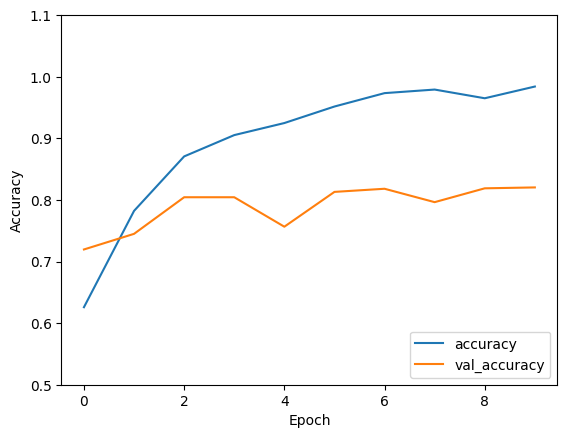

In [ ]:
#Graficamos la diferencia de la exactitud contra la de la validación.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

plt.show()

In [ ]:
#Establecer el uso del modelo para predecir imágenes.
predictions = model.predict(images_test)


44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step


In [ ]:
# Obtener el índice de la clase con mayor probabilidad para cada predicción
predicted_class = np.argmax(predictions[1])
true_class = labels_test[1]

In [ ]:
# Obtener las etiquetas correspondientes a los índices
predicted_label = class_names[predicted_class]
true_label = class_names[true_class]

print("La red dice que la imagen es clase {} y la clase verdadera es: {}".format(predicted_label, true_label))

La red dice que la imagen es clase fruit y la clase verdadera es: fruit


Predicciones con la RNAC entrenada.

In [ ]:
#Finalmente, solicitamos las 5 primeras predicciones, comparando valor esperado con real.
for i in range(5):
    # Obtener el índice de la clase con mayor probabilidad para la predicción i
    predicted_class = np.argmax(predictions[i])
    true_class = labels_test[i]

    # Obtener las etiquetas correspondientes a los índices
    predicted_label = class_names[predicted_class]
    true_label = class_names[true_class]

    print("Predicción {}: La red dice que la imagen es clase '{}' y la clase verdadera es: '{}'".format(i+1, predicted_label, true_label))

Predicción 1: La red dice que la imagen es clase 'cat' y la clase verdadera es: 'cat'
Predicción 2: La red dice que la imagen es clase 'fruit' y la clase verdadera es: 'fruit'
Predicción 3: La red dice que la imagen es clase 'flower' y la clase verdadera es: 'flower'
Predicción 4: La red dice que la imagen es clase 'car' y la clase verdadera es: 'airplane'
Predicción 5: La red dice que la imagen es clase 'car' y la clase verdadera es: 'car'


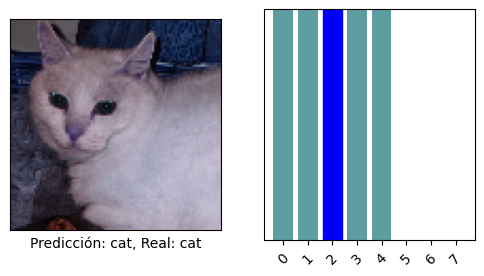

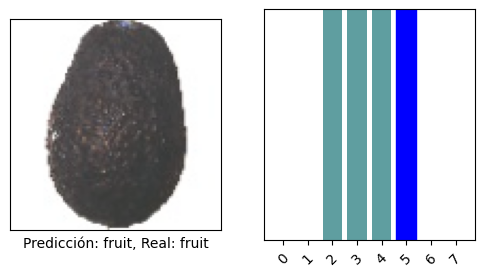

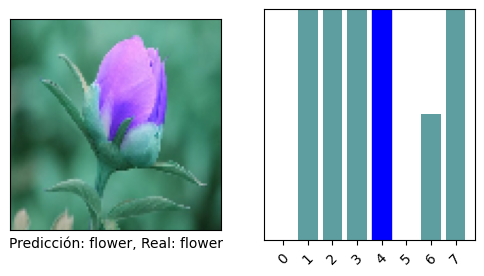

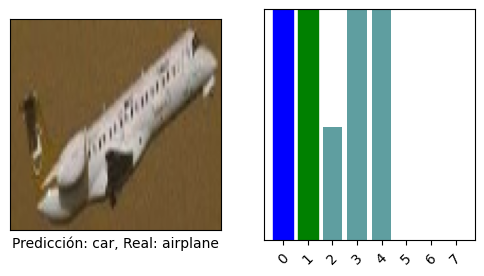

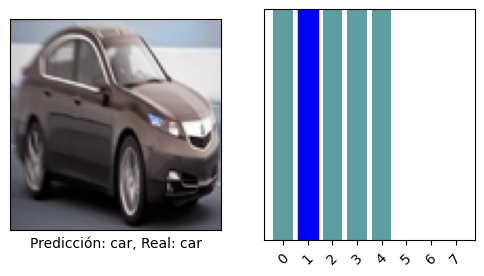

In [ ]:
# Iterar sobre las primeras cinco predicciones
for i in range(5):
    # Obtener el índice de la clase con mayor probabilidad para la predicción i
    predicted_class = np.argmax(predictions[i])
    true_class = labels_test[i]

    # Obtener las etiquetas correspondientes a los índices
    predicted_label = class_names[predicted_class]  # Use predicted_class as index instead of true_class
    true_label = class_names[true_class]  # Use true_class as index instead of predicted_class


    # Mostrar la imagen
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images_test[i], cmap=plt.cm.binary)
    plt.xlabel("Predicción: {}, Real: {}".format(predicted_label, true_label))

    # Mostrar la gráfica de barras de las predicciones
    #Ajustar las predicciones al tamaño de class_names
    predictions_adjusted = predictions[i][:len(class_names)]

    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(len(class_names)))
    plt.yticks([])
    thisplot = plt.bar(range(len(class_names)), predictions_adjusted, color="#5F9EA0") #Use predictions_adjusted
    plt.ylim([0, 1])
    plt.xticks(rotation=45)
    thisplot[predicted_class].set_color('green')
    thisplot[true_class].set_color('blue')
    plt.show()